In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
night_max = 366
dbfile='baseline_v1.3_10yrs.db'
conn = sqlite3.connect(dbfile)
df = pd.read_sql('select observationId, sunAlt, altitude, azimuth, observationStartMJD, night from summaryallprops where night <= %i order by observationId' % night_max, conn)
conn.close()

In [3]:
hits = np.load('hit_baseline_v1.3_10yrs.npy')
df['hit'] = hits['hit']

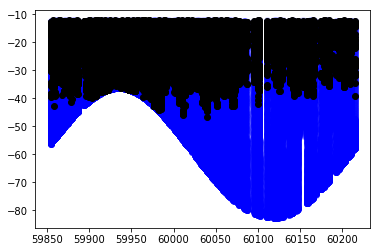

In [4]:
plt.plot(df['observationStartMJD'], df['sunAlt'], 'bo', alpha=.1)
blackout = np.where(df['hit'].values > 0)[0]
plt.plot(df['observationStartMJD'].values[blackout], df['sunAlt'].values[blackout], 'ko')

In [5]:
print('fraction of observations with hits = %f' % (blackout.size/df['hit'].values.size))

fraction of observations with hits = 0.105289


In [6]:
dt = np.where(df['sunAlt'] < -18.)[0]
dt_hit = np.where(df['hit'].values[dt] > 0)[0]
print('fraction of observations hit in non-twilight= %f' % (dt_hit.size/dt.size))

fraction of observations hit in non-twilight= 0.075108


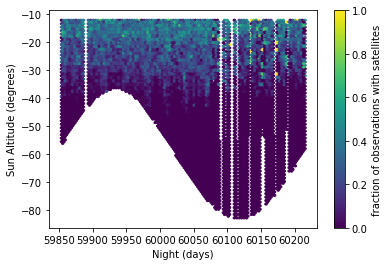

In [11]:
color = df['sunAlt']*0
color[blackout] = 1
plt.hexbin(df['observationStartMJD'], df['sunAlt'], color, reduce_C_function=np.mean)
cb = plt.colorbar()
plt.xlabel('Night (days)')
plt.ylabel('Sun Altitude (degrees)')
cb.set_label('fraction of observations with satellites')